In [1]:
#import the neccessary libraries
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization, Activation
import matplotlib.pyplot as plt

In [2]:
fminst= tf.keras.datasets.fashion_mnist

In [3]:
(training_images, training_labels), (test_images, test_labels) = fminst.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


LABEL: 9

IMAGE PIXEL ARRAY:

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0   0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62  54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134 144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178 107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216 216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1   1 

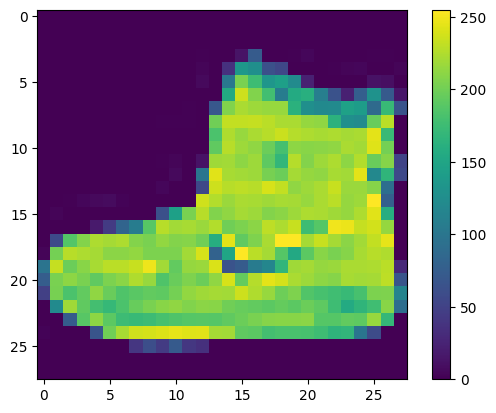

In [4]:
# You can put between 0 to 59999 here
index = 0

# Set number of characters per row when printing
np.set_printoptions(linewidth=320)

# Print the label and image
print(f'LABEL: {training_labels[index]}')
print(f'\nIMAGE PIXEL ARRAY:\n\n{training_images[index]}\n\n')

# Visualize the image using the default colormap (viridis)
plt.imshow(training_images[index])
plt.colorbar()
plt.show()

In [5]:
#normalize the pixel values to 0 or 1

training_images= training_images/255.0
test_images= test_images/255.0

In [24]:
model= tf.keras.Sequential([
    tf.keras.Input(shape=(28,28)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(1024,activation=tf.nn.relu),
    tf.keras.layers.Dense(10, activation= tf.nn.softmax)

])

In [7]:
# Declare sample inputs and convert to a tensor- Softmax activation function simple intution
inputs = np.array([[1.0, 3.0, 4.0, 2.0]])
inputs = tf.convert_to_tensor(inputs)
print(f'input to softmax function: {inputs.numpy()}')

# Feed the inputs to a softmax activation function
outputs = tf.keras.activations.softmax(inputs)
print(f'output of softmax function: {outputs.numpy()}')

# Get the sum of all values after the softmax
sum = tf.reduce_sum(outputs)
print(f'sum of outputs: {sum}')

# Get the index with highest value
prediction = np.argmax(outputs)
print(f'class with highest probability: {prediction}')

input to softmax function: [[1. 3. 4. 2.]]
output of softmax function: [[0.0320586  0.23688282 0.64391426 0.08714432]]
sum of outputs: 1.0
class with highest probability: 2


In [45]:
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('loss') < 0.3): # Experiment with changing this value
            print("\nReached 30% accuracy so cancelling training!")
            self.model.stop_training = True

callbacks = myCallback()


In [29]:
model.compile(optimizer= tf.optimizers.Adam(),
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(training_images, training_labels, epochs=5, callbacks=[callbacks]) #callback is used to stop the epoch means training after reaching a threshold

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 23s 12ms/step - accuracy: 0.8441 - loss: 0.4249
Epoch 2/5
1873/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8545 - loss: 0.3866
Reached 60% accuracy so cancelling training!
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 22s 12ms/step - accuracy: 0.8545 - loss: 0.3865


In [10]:
model.evaluate(test_images,test_labels)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8604 - loss: 0.3958


[0.40625548362731934, 0.8557999730110168]

In [11]:
classifications= model.predict(test_images)
print(classifications[0])

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
[6.7347041e-06 4.7160344e-07 3.6680574e-06 7.9992078e-06 9.3146291e-06 1.8575575e-02 2.6622889e-05 2.9847610e-01 7.8054942e-04 6.8211299e-01]


In [12]:
print(test_labels[0])

9


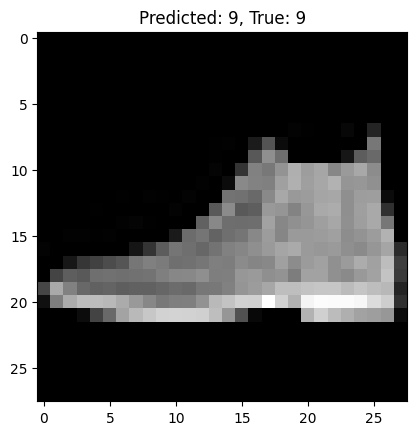

In [13]:
plt.imshow(test_images[0], cmap='gray')
plt.title(f"Predicted: {np.argmax(classifications[0])}, True: {test_labels[0]}")
plt.show()

In [18]:
#How many are wrong predictions?

wrong=[]
for i in range(len(test_labels)):
  if np.argmax(classifications[i]) != test_labels[i]:
     wrong.append(i)

print("Number of wrong predictions:", len(wrong))

Number of wrong predictions: 1442


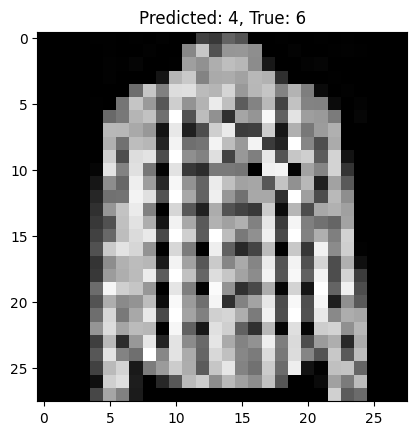

In [22]:
# Visulaize the worng predictions
i = wrong[100]  # pick any wrong index

plt.imshow(test_images[i], cmap='gray')
plt.title(
    f"Predicted: {np.argmax(classifications[i])}, True: {test_labels[i]}"
)
plt.show()


In [30]:
print(training_images.shape)

(60000, 28, 28)


USING THE CONVOLUTIONAL NEURAL **NETWORK**

In [38]:
model= tf.keras.Sequential([
    tf.keras.Input(shape=(28,28,1)),
    tf.keras.layers.Conv2D(32, (3,3), padding='same'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(64, (3,3), padding='same'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

In [39]:
training_images = training_images[..., np.newaxis]
test_images = test_images[..., np.newaxis]


In [46]:
model.compile(optimizer= tf.optimizers.Adam(),
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(training_images, training_labels, epochs=5, callbacks=[callbacks])

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - accuracy: 0.9404 - loss: 0.1564
Reached 30% accuracy so cancelling training!
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 120s 62ms/step - accuracy: 0.9404 - loss: 0.1564


In [47]:
model.evaluate(test_images,test_labels)

313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 18ms/step - accuracy: 0.9094 - loss: 0.2660


[0.256756067276001, 0.9089999794960022]